# Titanic dataset

The attritubes are:

1) Pclass-Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

2) survival-Survival (0 = No; 1 = Yes)

3) name-Name

4) sex-Sex

5) age-Age

6) sibsp-Number of Siblings/Spouses Aboard

7) parch-Number of Parents/Children Aboard

8) ticket-Ticket Number

9) fare-Passenger Fare (British pound)

10) cabin-Cabin

11) embarked-Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [319]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [320]:
train=pd.read_csv(r"D:\JAY\ML_AI_ATS\DAY2\Titanic_data\train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [321]:
# Creating the Data Dictionary with first column being datatype.
data = pd.DataFrame(train.dtypes)
data

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [322]:
train.shape

(891, 12)

In [323]:
train.size

10692

In [324]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [325]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [326]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [327]:
train.ndim

2

In [328]:
train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [329]:
train.groupby("Sex")["Survived"].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [330]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [331]:
#identifying the missing values from the dataset

data["Missing value"]=train.isnull().sum()
data

,0,Missing value
PassengerId,int64,0
Survived,int64,0
Pclass,int64,0
Name,object,0
Sex,object,0
Age,float64,177
SibSp,int64,0
Parch,int64,0
Ticket,object,0
Fare,float64,0


In [332]:
#identifying the count of the variables

data["Count"]=train.count()
data

,0,Missing value,Count
PassengerId,int64,0,891
Survived,int64,0,891
Pclass,int64,0,891
Name,object,0,891
Sex,object,0,891
Age,float64,177,714
SibSp,int64,0,891
Parch,int64,0,891
Ticket,object,0,891
Fare,float64,0,891


In [333]:
data=data.rename(columns={0:'DataType'})
data

,DataType,Missing value,Count
PassengerId,int64,0,891
Survived,int64,0,891
Pclass,int64,0,891
Name,object,0,891
Sex,object,0,891
Age,float64,177,714
SibSp,int64,0,891
Parch,int64,0,891
Ticket,object,0,891
Fare,float64,0,891


In [334]:
test=pd.read_csv(r"D:\JAY\ML_AI_ATS\DAY2\Titanic_data\test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [335]:
test.shape

(418, 11)

In [336]:
test.size

4598

In [337]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [338]:
test.ndim

2

In [339]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [340]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Countplots

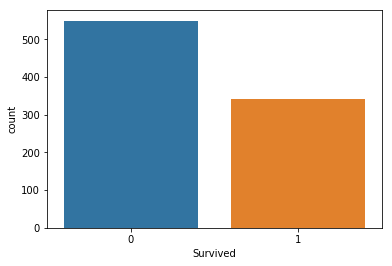

In [341]:
sns.countplot(x="Survived",data=train)

Observation(s):

1) We can see that the no. of people who survived is less than the no. of people who died.

2) Around 350 people survived.

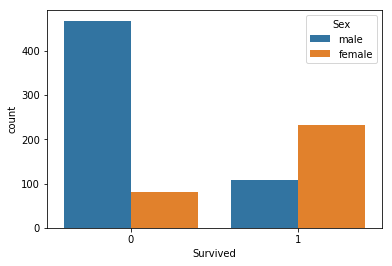

In [342]:
sns.countplot(x="Survived",hue="Sex",data=train)

Observation(s):

1) We can see that more no. of females survived as compared to male.

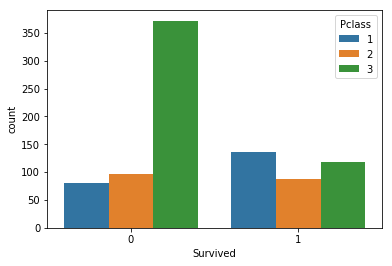

In [343]:
sns.countplot(x="Survived",hue="Pclass",data=train)

Observation(s):

1) We can say that the no. of people who belonged to the Pclass=1, i.e the first class had survived more than the people of Pclass=2 and Pclass=3.

2) We can say that the no. of people who belonged to the Pclass=3, i.e the third class had survived more than the people of Pclass=2.

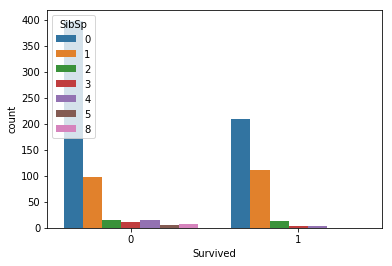

In [344]:
sns.countplot(x="Survived",hue="SibSp",data=train)

Observation(s):

1) Among the people who survived, highest count was of the people who had no siblings/spouses.

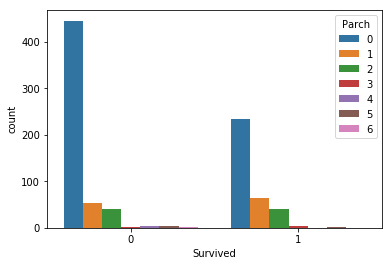

In [345]:
sns.countplot(x="Survived",hue="Parch",data=train)

Observation(s):

1) Among the people who survived, highest count was of the people who had no parent/children.

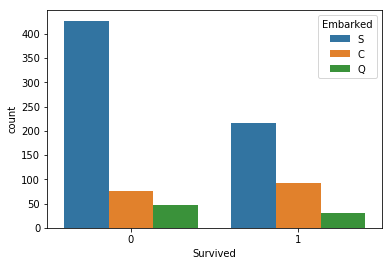

In [346]:
sns.countplot(x="Survived",hue="Embarked",data=train)

Observation(s):

1) People who embarked from S had the highest chances of survival compared to people who embarked from C and Q.

2) People who embarked from C had the highest chances of survival compared to people who embarked from Q.

# Box-plot

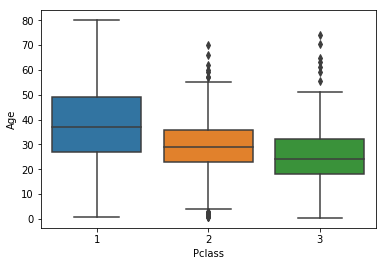

In [347]:
sns.boxplot(x="Pclass",y="Age",data=train)

Observation(s):

1) We can say that people with median age of 35 have taken class 1 ticket.

2) We can say that people with median age of 30 have taken class 3 ticket.

3) We can say that people with a median age of 25 have taken class 2 ticket.

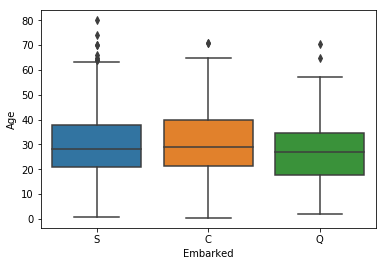

In [348]:
sns.boxplot(x="Embarked",y="Age",data=train)

Observation(s):

1) We cannot say much from this plot as the median lines are almost at the same level for all three ports.

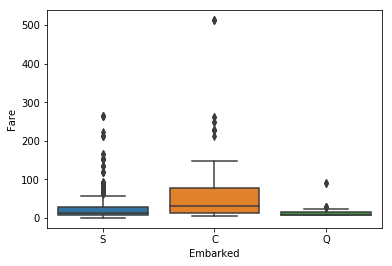

In [349]:
sns.boxplot(x="Embarked",y="Fare",data=train)

Observation(s):

1) The median fare for people embarked from port C wa higher.

# Bar-plot

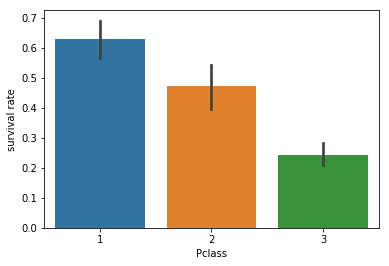

In [350]:
sns.barplot(x="Pclass",y="Survived",data=train)
plt.ylabel("survival rate")
plt.xlabel("Pclass")
plt.show()

Obervation(s):

1) We can say that people who were in first class had the highest chance of surviving.

2) As the class value increases, the chances of surviving decreases.

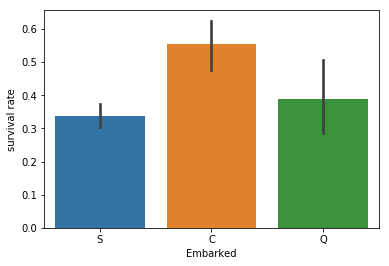

In [351]:
sns.barplot(x="Embarked",y="Survived",data=train)
plt.ylabel("survival rate")
plt.xlabel("Embarked")
plt.show()

Observation(s):

1) We can say that most of the people who embarked from port C had high chances of surviving.

2) People who embarked from port S had low chances of surviving.

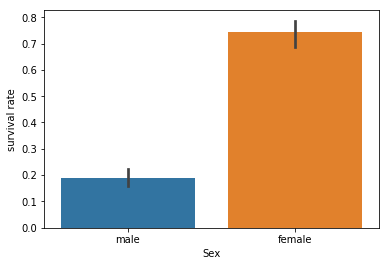

In [352]:
sns.barplot(x="Sex",y="Survived",data=train)
plt.ylabel("survival rate")
plt.xlabel("Sex")
plt.show()

Observation(s):

1) We can get an insight that females had a higher chance of survival as compared to males.

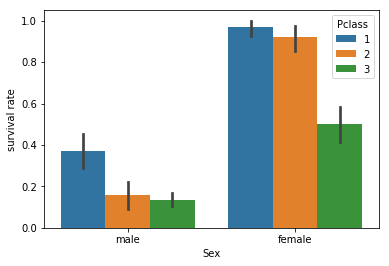

In [353]:
sns.barplot(x="Sex",y="Survived",hue="Pclass",data=train)
plt.ylabel("survival rate")
plt.xlabel("Sex")
plt.show()

Observation(s):

1) We can say that females of class 1 or 2 had a higher chance of surviving.

2) We can say that males of class 1 had a higher chance of survival in the male section.

3) The lowest survival rate was of the males of class 3.

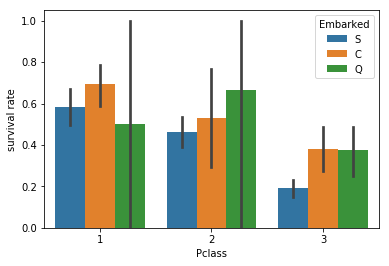

In [354]:
sns.barplot(x="Pclass",y="Survived",hue="Embarked",data=train)
plt.ylabel("survival rate")
plt.xlabel("Pclass")
plt.show()

Observation(s):

1) We can say that the people who were in class 1 and embarked from port C had more chances of surviving.

2) People who were in class 3 and embarked from port S had the lowest chance of surviving.

# Violin-plot

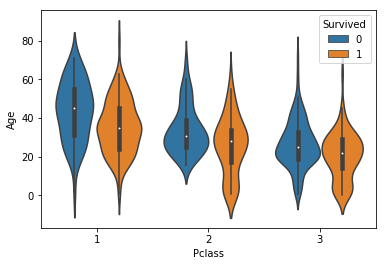

In [355]:
sns.violinplot(x="Pclass", y="Age",hue="Survived", data = train, size = 9)
plt.show()

Observation(s):

1) People between the age 20-40 seemed to have survived if they were from class 1.

2) Poeple from class 2 had less chances of surviving.

# Fill NaN with mean or mode

In [356]:
train['Age'] = train['Age'].fillna(train['Age'].mean())
test['Age'] = test['Age'].fillna(test['Age'].mean())

In [357]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [358]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [359]:
train['Embarked'] =train['Embarked'].fillna(train['Embarked'].mode().iloc[0]) 
test['Embarked'] = test['Embarked'].fillna(test['Embarked'].mode().iloc[0])

In [360]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [361]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [362]:
train["Fare"]=train["Fare"].fillna(train["Fare"].mean())
test["Fare"]=test["Fare"].fillna(test["Fare"].mean())

In [363]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [364]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64